# Lab | Web Scraping

Welcome to the "Books to Scrape" Web Scraping Adventure Lab!

**Objective**

In this lab, we will embark on a mission to unearth valuable insights from the data available on Books to Scrape, an online platform showcasing a wide variety of books. As data analyst, you have been tasked with scraping a specific subset of book data from Books to Scrape to assist publishing companies in understanding the landscape of highly-rated books across different genres. Your insights will help shape future book marketing strategies and publishing decisions.

**Background**

In a world where data has become the new currency, businesses are leveraging big data to make informed decisions that drive success and profitability. The publishing industry, much like others, utilizes data analytics to understand market trends, reader preferences, and the performance of books based on factors such as genre, author, and ratings. Books to Scrape serves as a rich source of such data, offering detailed information about a diverse range of books, making it an ideal platform for extracting insights to aid in informed decision-making within the literary world.

**Task**

Your task is to create a Python script using BeautifulSoup and pandas to scrape Books to Scrape book data, focusing on book ratings and genres. The script should be able to filter books with ratings above a certain threshold and in specific genres. Additionally, the script should structure the scraped data in a tabular format using pandas for further analysis.

**Expected Outcome**

A function named `scrape_books` that takes two parameters: `min_rating` and `max_price`. The function should scrape book data from the "Books to Scrape" website and return a `pandas` DataFrame with the following columns:

**Expected Outcome**

- A function named `scrape_books` that takes two parameters: `min_rating` and `max_price`.
- The function should return a DataFrame with the following columns:
  - **UPC**: The Universal Product Code (UPC) of the book.
  - **Title**: The title of the book.
  - **Price (£)**: The price of the book in pounds.
  - **Rating**: The rating of the book (1-5 stars).
  - **Genre**: The genre of the book.
  - **Availability**: Whether the book is in stock or not.
  - **Description**: A brief description or product description of the book (if available).
  
You will execute this script to scrape data for books with a minimum rating of `4.0 and above` and a maximum price of `£20`. 

Remember to experiment with different ratings and prices to ensure your code is versatile and can handle various searches effectively!

**Resources**

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
- [Books to Scrape](https://books.toscrape.com/)


**Hint**

Your first mission is to familiarize yourself with the **Books to Scrape** website. Navigate to [Books to Scrape](http://books.toscrape.com/) and explore the available books to understand their layout and structure. 

Next, think about how you can set parameters for your data extraction:

- **Minimum Rating**: Focus on books with a rating of 4.0 and above.
- **Maximum Price**: Filter for books priced up to £20.

After reviewing the site, you can construct a plan for scraping relevant data. Pay attention to the details displayed for each book, including the title, price, rating, and availability. This will help you identify the correct HTML elements to target with your scraping script.

Make sure to build your scraping URL and logic based on the patterns you observe in the HTML structure of the book listings!


---

**Best of luck! Immerse yourself in the world of books, and may the data be with you!**

**Important Note**:

In the fast-changing online world, websites often update and change their structures. When you try this lab, the **Books to Scrape** website might differ from what you expect.

If you encounter issues due to these changes, like new rules or obstacles preventing data extraction, don’t worry! Get creative.

You can choose another website that interests you and is suitable for scraping data. Options like Wikipedia, The New York Times, or even library databases are great alternatives. The main goal remains the same: extract useful data and enhance your web scraping skills while exploring a source of information you enjoy. This is your opportunity to practice and adapt to different web environments!

In [1]:
    import pandas as pd
    import requests
    from bs4 import BeautifulSoup
    url = "https://books.toscrape.com/"
    requests.get(url)

<Response [200]>

In [19]:
def scrape_books():
    import pandas as pd
    import requests
    from bs4 import BeautifulSoup
    url = "https://books.toscrape.com/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    titles = []
    prices = []
    ratings = []
    availabilities =[]

    # Find all components
    components = soup.find_all('article', class_='product_pod')

    for component in components:

        # Extract titles
        title = component.find('a', class_='title')
        titles.append(title)

        # Extract price
        price = component.find('p', class_='price_color')
        prices.append(price)

        # Extract ratings
        rating = component.find("p", class_="star-rating").text.strip()
        ratings.append(rating)

        # Extract availabilities
        availability = component.find("p", class_ = "instock availability").text.strip()
        availabilities.append(availability)


    # Create DataFrame
    book_df = pd.DataFrame({
        'Title': titles,
        'Price': prices,
        'Rating': ratings,
        'Availability': availabilities,
    })

    
    return book_df

Reference to get the text
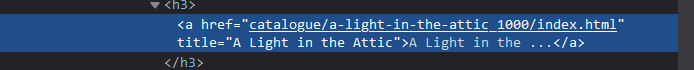

In [20]:
df = scrape_books()
df

,Title,Price,Rating,Availability
0,None,[£51.77],,In stock
1,None,[£53.74],,In stock
2,None,[£50.10],,In stock
3,None,[£47.82],,In stock
4,None,[£54.23],,In stock
5,None,[£22.65],,In stock
6,None,[£33.34],,In stock
7,None,[£17.93],,In stock
8,None,[£22.60],,In stock
9,None,[£52.15],,In stock


In [6]:
def scrape_books():
    import pandas as pd
    import requests
    from bs4 import BeautifulSoup

    url = "https://books.toscrape.com/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    titles = []
    prices = []
    ratings = []
    availabilities = []

    # Find all components
    components = soup.find_all('article', class_='product_pod')

    for component in components:
        # Extract titles from the title attribute of the <a> tag
        title = component.find('h3').find('a')['title']
        titles.append(title)

        # Extract price
        price = component.find('p', class_='price_color').text.strip()
        prices.append(price)

        # Extract ratings by parsing class
        rating_classes = component.find('p', class_='star-rating')['class']
        rating = [cls for cls in rating_classes if cls != 'star-rating'][0]  # Get the actual rating
        ratings.append(rating)

        # Extract availability and clean up whitespace
        availability = component.find('p', class_='instock availability').text.strip()
        availabilities.append(availability)

    # Create DataFrame
    book_df = pd.DataFrame({
        'Title': titles,
        'Price': prices,
        'Rating': ratings,
        'Availability': availabilities,
    })

    return book_df

In [8]:
df = scrape_books()
df

,Title,Price,Rating,Availability
0,A Light in the Attic,£51.77,Three,In stock
1,Tipping the Velvet,£53.74,One,In stock
2,Soumission,£50.10,One,In stock
3,Sharp Objects,£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,£54.23,Five,In stock
5,The Requiem Red,£22.65,One,In stock
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four,In stock
7,The Coming Woman: A Novel Based on the Life of...,£17.93,Three,In stock
8,The Boys in the Boat: Nine Americans and Their...,£22.60,Four,In stock
9,The Black Maria,£52.15,One,In stock


In [ ]:
def scrape_books(min_rating, max_price):
    import pandas as pd
    import requests
    from bs4 import BeautifulSoup
    import re

    base_url = "https://books.toscrape.com/"
    url = base_url + "catalogue/page-1.html"
    
    upc = []
    titles = []
    prices = []
    ratings = []
    genres = []
    availabilities = []
    descriptions = []

    # Helper to convert star class to numeric rating
    rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}

    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        books = soup.find_all('article', class_='product_pod')

        for book in books:
            title = book.h3.a['title']
            rating_class = book.find('p', class_='star-rating')['class'][1]
            rating = rating_map[rating_class]
            price_text = book.find('p', class_='price_color').text
            price = float(re.search(r'\d+\.\d+', price_text).group())

            # Apply filtering
            if rating < min_rating or price > max_price:
                continue

            book_url = base_url + "catalogue/" + book.h3.a['href'].replace('../../../', '')
            book_resp = requests.get(book_url)
            book_soup = BeautifulSoup(book_resp.text, 'html.parser')

            upc_val = book_soup.find('th', text='UPC').find_next_sibling('td').text
            availability = book_soup.find('p', class_='instock availability').text.strip()
            desc_tag = book_soup.find('div', id='product_description')
            description = desc_tag.find_next_sibling('p').text.strip() if desc_tag else 'No description'
            genre = book_soup.find('ul', class_='breadcrumb').find_all('li')[2].text.strip()

            # Append data
            upc.append(upc_val)
            titles.append(title)
            prices.append(price)
            ratings.append(rating)
            genres.append(genre)
            availabilities.append(availability)
            descriptions.append(description)

        # Move to next page
        next_btn = soup.find('li', class_='next')
        if next_btn:
            next_url = next_btn.a['href']
            url = base_url + "catalogue/" + next_url
        else:
            url = None

    # Create DataFrame
    book_df = pd.DataFrame({
        'UPC': upc,
        'Title': titles,
        'Price': prices,
        'Rating': ratings,
        'Genre': genres,
        'Availability': availabilities,
        'Description': descriptions
    })

    return book_df
